<a href="https://colab.research.google.com/github/nour-said/CIFAR-Object-Recognition-/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:

!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/wordroid/cifar10-object-recognition-in-images-zip-file")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: noursaid5
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/wordroid/cifar10-object-recognition-in-images-zip-file


100%|██████████| 1.54G/1.54G [00:16<00:00, 103MB/s] 


In [4]:
!ls

cifar10-object-recognition-in-images-zip-file  sample_data


In [5]:
ds= '/content/cifar10-object-recognition-in-images-zip-file'

In [6]:
!ls

cifar10-object-recognition-in-images-zip-file  sample_data


In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [8]:
fn = os.listdir('cifar10-object-recognition-in-images-zip-file/train_test')
fn

['train.zip', 'test', 'train', 'test.zip']

In [9]:
labels_df = pd.read_csv('/content/cifar10-object-recognition-in-images-zip-file/trainLabels.csv')
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [10]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [11]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

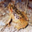

In [12]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/cifar10-object-recognition-in-images-zip-file/train_test/train/train/7796.png')
cv2_imshow(img)

In [13]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [14]:
id_list = list(labels_df['id'])


In [15]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [16]:
train_data_folder = '/content/cifar10-object-recognition-in-images-zip-file/train_test/train/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [17]:
len(data)

50000

In [18]:
data[0].shape

(32, 32, 3)

In [19]:
X = np.array(data)
Y = np.array(labels)

In [20]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [24]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [25]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [26]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [27]:
history = model.fit(X_train_scaled, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 427s 334ms/step - acc: 0.3232 - loss: 2.0547 - val_acc: 0.7500 - val_loss: 0.9007
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 372s 331ms/step - acc: 0.6613 - loss: 1.1146 - val_acc: 0.8755 - val_loss: 0.5126
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 371s 330ms/step - acc: 0.7797 - loss: 0.8162 - val_acc: 0.9107 - val_loss: 0.4017
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 371s 330ms/step - acc: 0.8544 - loss: 0.6178 - val_acc: 0.9300 - val_loss: 0.2940
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 372s 330ms/step - acc: 0.9032 - loss: 0.4725 - val_acc: 0.9310 - val_loss: 0.2795
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 371s 330ms/step - acc: 0.9275 - loss: 0.3749 - val_acc: 0.9355 - val_loss: 0.2450
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 371s 330ms/step - acc: 0.9495 - loss: 0.2975 - val_acc: 0.9420 - val_loss: 0.2320
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 371s 329ms/step - acc: 0.9619 - loss: 0.2432 - val_acc: 0.9435 - val_loss: 0.2228
Epoch 9/

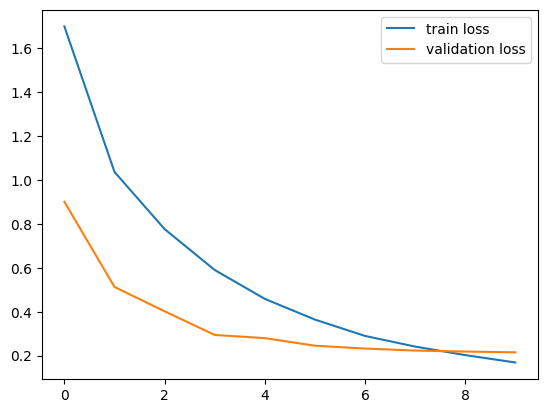

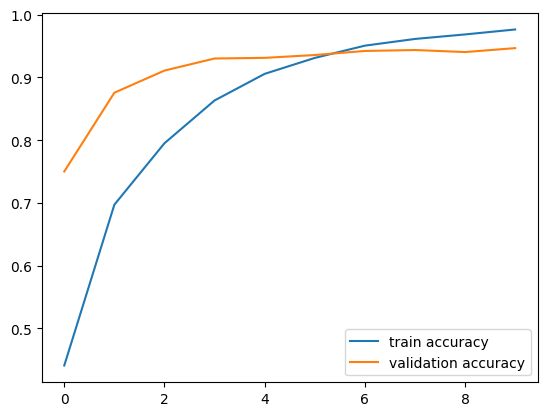

In [28]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()